# MSc. Dissertation - DataScience
## BACKGROUND:   
### Analysis of Remote Work Impact on Employee Well-Being (Cleaned Secondary Dataset)

In [16]:
# Importing necessary libraries here below:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

In [18]:
# Loading in the cleaned dataset
wfh_mentalHealth_data = pd.read_csv('../Secondary_Research/SR_Dataset/cleaned_Remote_Work_on_Mental_Health.csv')

In [20]:
wfh_mentalHealth_data

,Employee_ID,Age,Gender,Years_of_Experience,Work_Location,Hours_Worked_Per_Week,Number_of_Virtual_Meetings,Work_Life_Balance_Rating,Stress_Level,Access_to_Mental_Health_Resources,...,Industry_Healthcare,Industry_IT,Industry_Manufacturing,Industry_Retail,Region_Asia,Region_Europe,Region_North America,Region_Oceania,Region_South America,Work_Stress_Score
0,EMP0002,40,1.0,3,1,52,4,1,2,0,...,False,True,False,False,True,False,False,False,False,55
1,EMP0010,30,1.0,28,2,57,6,1,1,1,...,False,True,False,False,False,False,True,False,False,62
2,EMP0013,40,1.0,1,1,21,7,2,3,1,...,False,False,False,False,False,True,False,False,False,26
3,EMP0016,56,1.0,13,1,44,11,4,1,0,...,True,False,False,False,False,False,False,False,False,51
4,EMP0020,59,0.0,13,1,59,4,3,2,0,...,False,False,False,False,False,False,False,False,True,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1300,EMP4980,26,0.0,26,2,34,10,5,2,1,...,False,False,False,True,False,False,False,False,False,39
1301,EMP4982,57,0.0,17,3,58,15,2,2,1,...,False,False,False,False,False,False,False,True,False,71
1302,EMP4992,60,1.0,9,2,57,4,2,1,1,...,False,True,False,False,False,False,False,True,False,59
1303,EMP4996,32,0.0,4,3,24,2,5,3,1,...,False,False,False,False,True,False,False,False,False,21


### 2.1 Computing Correlation Matrix:

In [23]:
#Selecting only numeric columns (int)
numeric_only_df = wfh_mentalHealth_data.select_dtypes(include=['number'])

In [25]:
# Computing correlation matrix
correlation_matrix = numeric_only_df.corr()

In [27]:
# Displaying the result
print(correlation_matrix)

                                        Age    Gender  Years_of_Experience  \
Age                                1.000000 -0.022518            -0.004148   
Gender                            -0.022518  1.000000             0.012084   
Years_of_Experience               -0.004148  0.012084             1.000000   
Work_Location                     -0.004790 -0.048112            -0.002277   
Hours_Worked_Per_Week             -0.003125 -0.062223            -0.018181   
Number_of_Virtual_Meetings        -0.014960  0.000515             0.024556   
Work_Life_Balance_Rating           0.001685  0.031515             0.010466   
Stress_Level                      -0.017523  0.009709            -0.011510   
Access_to_Mental_Health_Resources -0.010296 -0.032068             0.055036   
Social_Isolation_Rating           -0.024543  0.016612            -0.000756   
Satisfaction_with_Remote_Work      0.022530  0.002680             0.054097   
Company_Support_for_Remote_Work    0.025452 -0.000895           

### 2.1.1 Constructing Heatmap:

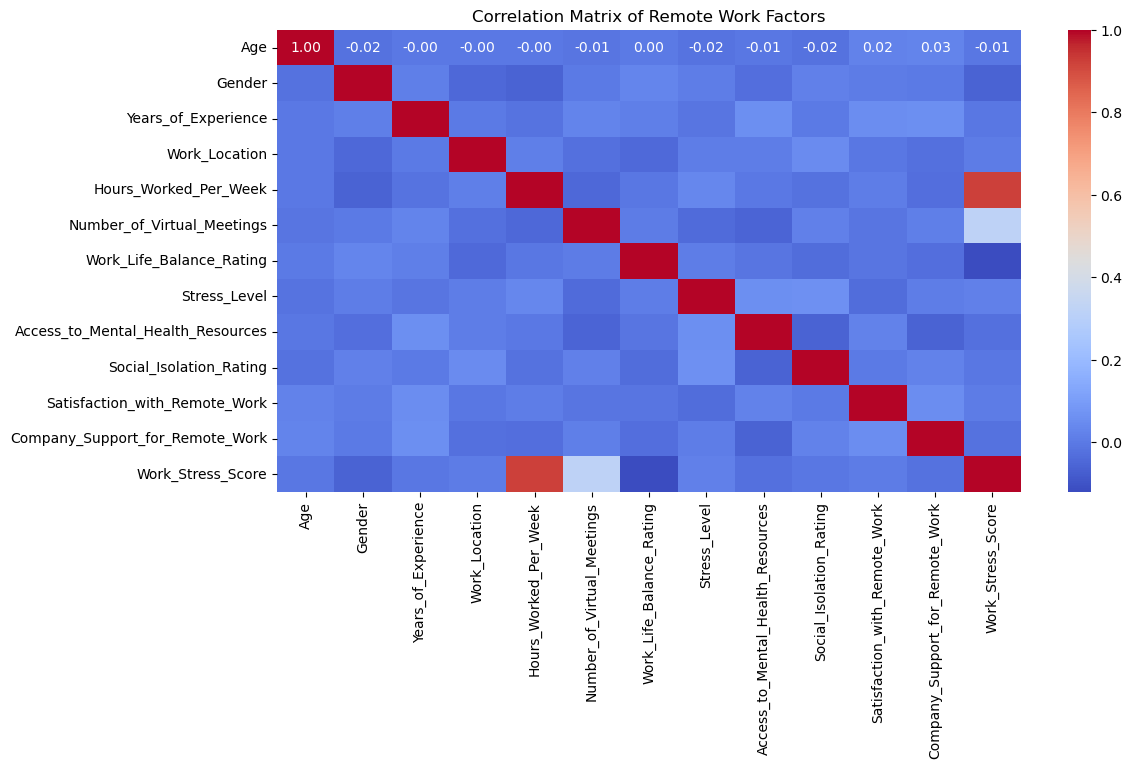

In [44]:
# Saving correlation matrix to file
correlation_matrix.to_csv("../Secondary_Research/results/correlation_matrix.csv")

# Plotting heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix of Remote Work Factors")
plt.savefig("../IMG/correlation_matrix.png")
plt.show()

### 2.1.2 Interpretation of the above:
- Stress_Level appears to have a strong positive correlation with Hours_Worked_Per_Week meaning employees who work longer hours tend to report higher stress.
- Access_to_Mental_Health_Resources has a negative correlation with Stress_Level meaning that access to resources might reduce stress.
- Work_Life_Balance_Rating is negatively correlated with Social_Isolation_Rating which means better balance is linked to less isolation.

### 2.2 Defining independent variables (features) for RM

In [13]:
# Defining independent variables (features)
X = wfh_mentalHealth_data[['Hours_Worked_Per_Week', 'Number_of_Virtual_Meetings', 'Access_to_Mental_Health_Resources', 'Company_Support_for_Remote_Work']]
X = sm.add_constant(X)  # Adding constant for intercept

### 2.2.1 Building Regression Model

In [15]:
# Defining dependent variable (target)
y = wfh_mentalHealth_data['Stress_Level']

# Building regression model
rg_model = sm.OLS(y, X).fit()

# Displaying results
print(rg_model.summary())

# Saving regression summary to file
with open("../Secondary_Research/results/regression_summary.txt", "w") as f:
    f.write(rg_model.summary().as_text())

                            OLS Regression Results                            
Dep. Variable:           Stress_Level   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.003
Method:                 Least Squares   F-statistic:                     1.913
Date:                Tue, 01 Apr 2025   Prob (F-statistic):              0.106
Time:                        15:10:02   Log-Likelihood:                -1571.1
No. Observations:                1305   AIC:                             3152.
Df Residuals:                    1300   BIC:                             3178.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
const 